# TSpec-LLM Dataset

## What is TSpec-LLM
The TSpec-LLM Dataset is the dataset that contains 3GPP documents, but they have already been modified and formatted into markdown files to facilitate usage and integration into LLMs. 

In this project, only 3GPP release 17 was used. The TSpec-LLM dataset was used to perform retrieval using RAG (Retrieval-Augmented Generation).

In [1]:
# import Process_tspec_llm

# processTspec = Process_tspec_llm

## Verify TSpec-LLM Data

In [2]:
# directory_path = '../Dataset/TSpec-LLM/3GPP-clean'
# md_sizes_report = processTspec.calculate_md_sizes_and_word_count(directory_path)
# json_filename = 'md_sizes_word_count_report.json'
# processTspec.save_report_to_json(md_sizes_report, json_filename)
# processTspec.print_summary(md_sizes_report)


# TeleQnA Dataset

## Test Questions Dataset

100 questions to evaluate the models.

The questions were evaluated in two ways: 

1 - The question was asked along with options, and the model was expected to choose the correct option. 

2 - The question was asked without options, and the model had to answer based solely on the question.

In [3]:
import json

# Path to the TeleQnA processed question in JSON file
rel17_100_questions_path = r"../Files/rel17_100_questions.json"

# Load the TeleQnA data just release 17
with open(rel17_100_questions_path, "r", encoding="utf-8") as file:
    rel17_100_questions = json.load(file)
print(len(rel17_100_questions))

100


In [4]:
rel17_100_questions[0]

{'question': 'Which NGAP procedure is used for inter-system load balancing? [3GPP Release 17]',
 'option 1': 'eNB Configuration Transfer',
 'option 2': 'Downlink RAN Configuration Transfer',
 'option 3': 'Uplink RAN Configuration Transfer',
 'option 4': 'MME Configuration Transfer',
 'answer': 'option 3: Uplink RAN Configuration Transfer',
 'explanation': 'The NGAP procedure used for inter-system load balancing is Uplink RAN Configuration Transfer.',
 'category': 'Standards overview'}

## Train Dataset

The training dataset is also composed of questions from TeleQnA.

A total of 4,000 questions were selected from TeleQnA, which are different from the test dataset containing 100 questions.

Out of these 4,000 questions, 2,000 had options, with the label being the correct option along with its text, while the other 2,000 questions had no options, with the label being only the text of the correct answer.

In [5]:
from datasets import load_from_disk

dataset_path = '../Files/train_questions_dataset_4000_questions_short_answer_labels'

dataset = load_from_disk(dataset_path)

print(len(dataset))

4000


In [6]:
dataset[3]

{'conversations': [{'from': 'human',
   'value': 'Question: Which type of pulse adaptation is equivalent to the dilation of the pulse depending on the channel dispersion in time and frequency?\nOptions:\noption 1: Grid adaptation\noption 2: Pulse adaptation\noption 3: Uniform spacing adaptation\noption 4: Rectangular spacing adaptation\n'},
  {'from': 'gpt', 'value': 'Answer: option 2: Pulse adaptation\n'}]}

# Results

Three models were evaluated:

1 - Llama 3.2 with 3 billion parameters

2 - Llama 3.2 with 3 billion parameters with fine-tuning, using 4,000 questions for training

3 - GPT-4o-mini

The models were evaluated both without RAG and with RAG, where relevant information was provided as context for the question.

## Accuracy Results

In [5]:
from utils.accuracy_evaluator import evaluate_accuracy
from utils.load_json import load_responses

100


In [3]:
RAG_llama_3_2_lora_path = "../Models_responses/Accuracy/llama_3.2_lora_short_answer_RAG_responses.json"
RAG_llama_3_2_path = "../Models_responses/Accuracy/llama_3.2_RAG_responses.json"
RAG_gpt4_path = "../Models_responses/Accuracy/gpt4_RAG_responses.json"
llama_3_2_lora_path = "../Models_responses/Accuracy/llama_3.2_lora_short_answer_responses.json"
llama_3_2_path = "../Models_responses/Accuracy/llama_3.2_responses.json"
gpt4_path = "../Models_responses/Accuracy/gpt4_responses.json"

In [6]:
RAG_llama_3_2_lora = load_responses(RAG_llama_3_2_lora_path)
RAG_llama_3_2 = load_responses(RAG_llama_3_2_path)
RAG_gpt4 = load_responses(RAG_gpt4_path)
llama_3_2_lora = load_responses(llama_3_2_lora_path)
llama_3_2 = load_responses(llama_3_2_path)
gpt4 = load_responses(gpt4_path)

In [7]:
RAG_llama_3_2_lora[0]

{'question': 'Which NGAP procedure is used for inter-system load balancing? [3GPP Release 17]',
 'answer': 'option 3: Uplink RAN Configuration Transfer',
 'response': "system\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nuser\n\nRelevant Information:\nInformation 1:\nconsider the responses before executing the planned change of its\nmobility setting.  \nAll automatic changes on the HO and/or reselection parameters must be\nwithin the range allowed by OAM.  \n#### 15.5.1.5 Load reporting for inter-system load balancing  \nThe load reporting function for inter-system load balancing is executed\nby exchanging load information between NG-RAN and E-UTRAN. Both\nevent-triggered and periodic inter-system load reporting are supported.\nEvent-triggered inter-system load reports are sent when the reporting\nnode detects crossing of cell load thresholds.  \nThe following load related information should be supported:  \n\\- Cell Capacity Class value (UL/DL relative capacity

In [8]:
# Function to evaluate responses from all models and calculate accuracy
def evaluate_accuracy_all_models():
    # Evaluate accuracy and collect incorrect question indices for each model
    accuracy_llama_3_2_lora, none_llama_3_2_lora, incorrect_llama_3_2_lora = evaluate_accuracy(RAG_llama_3_2_lora)
    accuracy_llama_3_2, none_llama_3_2, incorrect_llama_3_2 = evaluate_accuracy(RAG_llama_3_2)
    accuracy_gpt4_rag, none_gpt4_rag, incorrect_gpt4_rag = evaluate_accuracy(RAG_gpt4)
    accuracy_llama_3_2_lora_no_rag, none_llama_3_2_lora_no_rag, incorrect_llama_3_2_lora_no_rag = evaluate_accuracy(llama_3_2_lora)
    accuracy_llama_3_2_no_rag, none_llama_3_2_no_rag, incorrect_llama_3_2_no_rag = evaluate_accuracy(llama_3_2)
    accuracy_gpt4_no_rag, none_gpt4_no_rag, incorrect_gpt4_no_rag = evaluate_accuracy(gpt4)

    # Store results in a dictionary
    results = {
        "RAG llama 3.2 3B Lora": {"accuracy": accuracy_llama_3_2_lora, "none_count": none_llama_3_2_lora, "incorrect_questions": incorrect_llama_3_2_lora},
        "RAG llama 3.2 3B": {"accuracy": accuracy_llama_3_2, "none_count": none_llama_3_2, "incorrect_questions": incorrect_llama_3_2},
        "RAG GPT-4o-mini": {"accuracy": accuracy_gpt4_rag, "none_count": none_gpt4_rag, "incorrect_questions": incorrect_gpt4_rag},
        "Llama 3.2 3B Lora (no RAG)": {"accuracy": accuracy_llama_3_2_lora_no_rag, "none_count": none_llama_3_2_lora_no_rag, "incorrect_questions": incorrect_llama_3_2_lora_no_rag},
        "Llama 3.2 3B (no RAG)": {"accuracy": accuracy_llama_3_2_no_rag, "none_count": none_llama_3_2_no_rag, "incorrect_questions": incorrect_llama_3_2_no_rag},
        "GPT-4o-mini (no RAG)": {"accuracy": accuracy_gpt4_no_rag, "none_count": none_gpt4_no_rag, "incorrect_questions": incorrect_gpt4_no_rag}
    }

    return results

# Compare incorrect question indices across models with RAG and without RAG
def compare_incorrect_questions(results):
    # Extract incorrect question indices for RAG models
    rag_incorrect_sets = [
        set(results["RAG llama 3.2 3B Lora"]["incorrect_questions"]),
        set(results["RAG llama 3.2 3B"]["incorrect_questions"]),
        set(results["RAG GPT-4o-mini"]["incorrect_questions"])
    ]
    
    # Extract incorrect question indices for no-RAG models
    no_rag_incorrect_sets = [
        set(results["Llama 3.2 3B Lora (no RAG)"]["incorrect_questions"]),
        set(results["Llama 3.2 3B (no RAG)"]["incorrect_questions"]),
        set(results["GPT-4o-mini (no RAG)"]["incorrect_questions"])
    ]

    # Find common incorrect question indices across RAG models
    common_incorrect_rag = sorted(set.intersection(*rag_incorrect_sets))
    # Find common incorrect question indices across no-RAG models
    common_incorrect_no_rag = sorted(set.intersection(*no_rag_incorrect_sets))

    return common_incorrect_rag, len(common_incorrect_rag), common_incorrect_no_rag, len(common_incorrect_no_rag)

In [9]:
# Run evaluation and compare incorrect questions
accuracy_results = evaluate_accuracy_all_models()
common_incorrect_rag, common_count_rag, common_incorrect_no_rag, common_count_no_rag = compare_incorrect_questions(accuracy_results)

# Display summary of accuracy results
print("\nSummary of all models' accuracy:")
for model_name, result in accuracy_results.items():
    print(f"{model_name} - Accuracy: {result['accuracy']:.2f}%, 'None' responses: {result['none_count']}")

# Display common incorrect question indices and their counts for RAG and no-RAG models
print("\nCommon incorrect question indices across RAG models:")
print(common_incorrect_rag)
print(f"Total common incorrect questions in RAG models: {common_count_rag}")

print("\nCommon incorrect question indices across no-RAG models:")
print(common_incorrect_no_rag)
print(f"Total common incorrect questions in no-RAG models: {common_count_no_rag}")


Summary of all models' accuracy:
RAG llama 3.2 3B Lora - Accuracy: 77.00%, 'None' responses: 0
RAG llama 3.2 3B - Accuracy: 72.00%, 'None' responses: 2
RAG GPT-4o-mini - Accuracy: 73.00%, 'None' responses: 0
Llama 3.2 3B Lora (no RAG) - Accuracy: 48.00%, 'None' responses: 0
Llama 3.2 3B (no RAG) - Accuracy: 42.00%, 'None' responses: 2
GPT-4o-mini (no RAG) - Accuracy: 58.00%, 'None' responses: 0

Common incorrect question indices across RAG models:
[4, 14, 18, 19, 31, 37, 57, 59, 69, 86, 90, 93, 94, 99]
Total common incorrect questions in RAG models: 14

Common incorrect question indices across no-RAG models:
[0, 6, 11, 14, 18, 19, 26, 39, 42, 52, 54, 55, 56, 59, 61, 63, 67, 69, 73, 75, 86, 90, 94]
Total common incorrect questions in no-RAG models: 23


In [13]:
import matplotlib.pyplot as plt

def plot_model_accuracies(accuracy_results):
    """
    Plot a bar chart comparing the accuracies of different models, with all bars in gray.
    """
    # Extract model names and their accuracies
    model_names = list(accuracy_results.keys())
    accuracies = [result['accuracy'] for result in accuracy_results.values()]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, accuracies, color='gray')  # Set all bars to gray
    
    # Add labels and title
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Accuracy Comparison")
    plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
    
    # Display values above bars
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.tight_layout()  # Adjust layout to fit all elements

    # Show the plot
    plt.show()

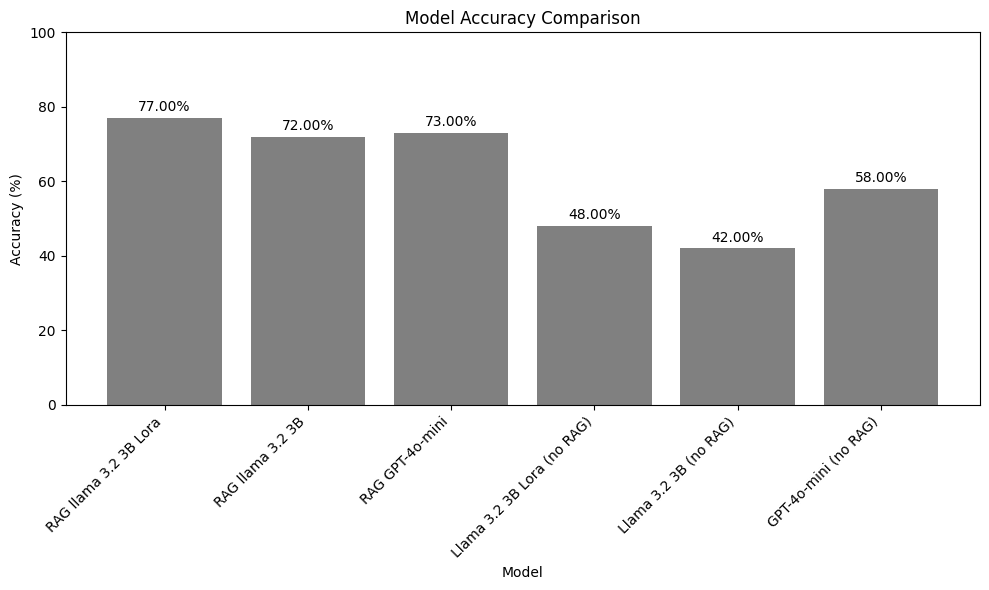

In [14]:
# Call the function with the accuracy results
plot_model_accuracies(accuracy_results)

## RAGAS Results

In [39]:
import pandas as pd

### LLM Evaluation

In [49]:
# Load the data from CSV files
RAGAS_RAG_llama_3_2_lora = pd.read_csv("../Evaluations/RAGAS/LLM_evaluation/llama_3_2_lora_short_answer_RAG_evaluation_RAGAS_LLM.csv")
RAGAS_RAG_llama_3_2 = pd.read_csv("../Evaluations/RAGAS/LLM_evaluation/llama_3_2_RAG_evaluation_RAGAS_LLM.csv")
RAGAS_RAG_gpt4 = pd.read_csv("../Evaluations/RAGAS/LLM_evaluation/gpt4_RAG_evaluation_RAGAS_LLM.csv")
RAGAS_llama_3_2_lora = pd.read_csv("../Evaluations/RAGAS/LLM_evaluation/llama_3_2_lora_short_answer_evaluation_RAGAS_LLM.csv")
RAGAS_llama_3_2 = pd.read_csv("../Evaluations/RAGAS/LLM_evaluation/llama_3_2_evaluation_RAGAS_LLM.csv")
RAGAS_gpt4 = pd.read_csv("../Evaluations/RAGAS/LLM_evaluation/gpt4_evaluation_RAGAS_LLM.csv")

In [50]:
RAGAS_RAG_llama_3_2_loraSource/Inference/Inference_RAG_llama_3.2_lora_short_answer.ipynb

,user_input,response,reference,factual_correctness,semantic_similarity,rubrics_score_with_reference
0,Which NGAP procedure is used for inter-system ...,intersystem load balancing procedure.,uplink ran configuration transfer.,0.00,0.228364,1
1,What is covered by enhanced application layer ...,all of the above.,advanced v2x services.,NaN,0.113409,1
2,What does the Load-Balancing steering mode do?...,divides the traffic of a data flow into two po...,splits the traffic of a data flow across 3gpp ...,0.57,0.858245,3
3,What is the main objective of intent driven ma...,satisfy the new or updated intent.,to reduce the complexity of management for net...,0.00,0.084886,1
4,What does MINT stand for? [3GPP Release 17],minimization of service interruption.,minimization of service interruption.,0.67,1.000000,4
...,...,...,...,...,...,...
95,Which RRC state is the UE in when no RRC conne...,inactive.,rrcidle.,0.00,0.211736,1
96,How are the antenna elements placed on each an...,a rectangular arrangement.,in both the vertical and horizontal directions.,0.00,0.370383,2
97,What information may be provided to an emergen...,current dispatchable location if available.,both 1 and 2.,0.00,0.125532,2
98,What is the purpose of cross-network slice coo...,to avoid any interference in the slice communi...,to coordinate network slices in multiple 5g ne...,0.00,0.488470,2


In [54]:
# Calculate means of each DataFrame's columns
means_llama_3_2_lora_RAG = RAGAS_RAG_llama_3_2_lora.mean(numeric_only=True)
means_llama_3_2_RAG = RAGAS_RAG_llama_3_2.mean(numeric_only=True)
means_gpt4_RAG = RAGAS_RAG_gpt4.mean(numeric_only=True)
means_llama_3_2_lora_no_RAG = RAGAS_llama_3_2_lora.mean(numeric_only=True)
means_llama_3_2_no_RAG = RAGAS_llama_3_2.mean(numeric_only=True)
means_gpt4_no_RAG = RAGAS_gpt4.mean(numeric_only=True)

# Combine means into a comparative table
model_means = pd.DataFrame({
    "RAG llama 3.2 3B Lora": means_llama_3_2_lora_RAG,
    "RAG llama 3.2 3B": means_llama_3_2_RAG,
    "RAG GPT-4o-mini": means_gpt4_RAG,
    "Llama 3.2 3B Lora (no RAG)": means_llama_3_2_lora_no_RAG,
    "Llama 3.2 3B (no RAG)": means_llama_3_2_no_RAG,
    "GPT-4o-mini (no RAG)": means_gpt4_no_RAG
}).T  # Transpose to have models as rows and metrics as columns

# Round for better readability
model_means = model_means.round(3)

In [58]:
print("Comparative Model Performance with LLM evaluation:")
model_means

Comparative Model Performance with LLM evaluation:


,factual_correctness,semantic_similarity,rubrics_score_with_reference
RAG llama 3.2 3B Lora,0.180,0.410,1.81
RAG llama 3.2 3B,0.141,0.415,2.37
RAG GPT-4o-mini,0.181,0.421,2.53
Llama 3.2 3B Lora (no RAG),0.008,0.349,1.53
Llama 3.2 3B (no RAG),0.078,0.500,1.95
GPT-4o-mini (no RAG),0.061,0.362,2.24


### No LLM Evalaution

In [56]:
# Load the data from CSV files
RAGAS_RAG_llama_3_2_lora = pd.read_csv("../Evaluations/RAGAS/No_LLM_evaluation/llama_3_2_lora_short_answer_RAG_evaluation_RAGAS_no_LLM.csv")
RAGAS_RAG_llama_3_2 = pd.read_csv("../Evaluations/RAGAS/No_LLM_evaluation/llama_3_2_RAG_evaluation_RAGAS_no_LLM.csv")
RAGAS_RAG_gpt4 = pd.read_csv("../Evaluations/RAGAS/No_LLM_evaluation/gpt4_RAG_evaluation_RAGAS_no_LLM.csv")
RAGAS_llama_3_2_lora = pd.read_csv("../Evaluations/RAGAS/No_LLM_evaluation/llama_3_2_lora_short_answer_evaluation_RAGAS_no_LLM.csv")
RAGAS_llama_3_2 = pd.read_csv("../Evaluations/RAGAS/No_LLM_evaluation/llama_3_2_evaluation_RAGAS_no_LLM.csv")
RAGAS_gpt4 = pd.read_csv("../Evaluations/RAGAS/No_LLM_evaluation/gpt4_evaluation_RAGAS_no_LLM.csv")

In [57]:
RAGAS_RAG_llama_3_2_lora

,user_input,response,reference,bleu_score,rouge_score,exact_match,string_present
0,Which NGAP procedure is used for inter-system ...,intersystem load balancing procedure.,uplink ran configuration transfer.,1.218332e-231,0.000000,0.0,0.0
1,What is covered by enhanced application layer ...,all of the above.,advanced v2x services.,1.218332e-231,0.000000,0.0,0.0
2,What does the Load-Balancing steering mode do?...,divides the traffic of a data flow into two po...,splits the traffic of a data flow across 3gpp ...,1.469925e-01,0.425532,0.0,0.0
3,What is the main objective of intent driven ma...,satisfy the new or updated intent.,to reduce the complexity of management for net...,8.676910e-232,0.133333,0.0,0.0
4,What does MINT stand for? [3GPP Release 17],minimization of service interruption.,minimization of service interruption.,1.000000e+00,1.000000,1.0,1.0
...,...,...,...,...,...,...,...
95,Which RRC state is the UE in when no RRC conne...,inactive.,rrcidle.,1.531972e-231,0.000000,0.0,0.0
96,How are the antenna elements placed on each an...,a rectangular arrangement.,in both the vertical and horizontal directions.,4.739132e-232,0.000000,0.0,0.0
97,What information may be provided to an emergen...,current dispatchable location if available.,both 1 and 2.,1.164047e-231,0.000000,0.0,0.0
98,What is the purpose of cross-network slice coo...,to avoid any interference in the slice communi...,to coordinate network slices in multiple 5g ne...,1.268852e-231,0.166667,0.0,0.0


In [60]:
# Calculate means of each DataFrame's columns
means_llama_3_2_lora_RAG = RAGAS_RAG_llama_3_2_lora.mean(numeric_only=True)
means_llama_3_2_RAG = RAGAS_RAG_llama_3_2.mean(numeric_only=True)
means_gpt4_RAG = RAGAS_RAG_gpt4.mean(numeric_only=True)
means_llama_3_2_lora_no_RAG = RAGAS_llama_3_2_lora.mean(numeric_only=True)
means_llama_3_2_no_RAG = RAGAS_llama_3_2.mean(numeric_only=True)
means_gpt4_no_RAG = RAGAS_gpt4.mean(numeric_only=True)

# Combine means into a comparative table
model_means = pd.DataFrame({
    "RAG llama 3.2 3B Lora": means_llama_3_2_lora_RAG,
    "RAG llama 3.2 3B": means_llama_3_2_RAG,
    "RAG GPT-4o-mini": means_gpt4_RAG,
    "Llama 3.2 3B Lora (no RAG)": means_llama_3_2_lora_no_RAG,
    "Llama 3.2 3B (no RAG)": means_llama_3_2_no_RAG,
    "GPT-4o-mini (no RAG)": means_gpt4_no_RAG
}).T  # Transpose to have models as rows and metrics as columns

# Round for better readability
model_means = model_means.round(3)

In [61]:
print("Comparative Model Performance with LLM evaluation:")
model_means

Comparative Model Performance with LLM evaluation:


,bleu_score,rouge_score,exact_match,string_present
RAG llama 3.2 3B Lora,0.066,0.243,0.06,0.07
RAG llama 3.2 3B,0.058,0.200,0.05,0.05
RAG GPT-4o-mini,0.039,0.197,0.04,0.04
Llama 3.2 3B Lora (no RAG),0.021,0.183,0.02,0.02
Llama 3.2 3B (no RAG),0.056,0.174,0.00,0.00
GPT-4o-mini (no RAG),0.003,0.139,0.00,0.02


# Classifier Statistical Significance

## Confidence Interval

In [9]:
# Modelos e suas respostas
models = {
    "RAG llama 3.2 3B Lora": RAG_llama_3_2_lora,
    "RAG llama 3.2 3B": RAG_llama_3_2,
    "RAG GPT-4o-mini": RAG_gpt4,
    "Llama 3.2 3B Lora (no RAG)": llama_3_2_lora,
    "Llama 3.2 3B (no RAG)": llama_3_2,
    "GPT-4o-mini (no RAG)": gpt4
}

In [15]:
# Function to calculate confidence interval
import math

def calculate_confidence_interval(accuracy, sample_size, confidence_level=0.95):
    """
    Calculate the confidence interval for a given accuracy and sample size.
    
    :param accuracy: Accuracy as a percentage (0-100).
    :param sample_size: Number of samples used to compute accuracy.
    :param confidence_level: Confidence level (default is 0.95 for 95% confidence).
    :return: Tuple (lower_bound, upper_bound) of the confidence interval.
    """
    accuracy_proportion = accuracy / 100
    z = 1.96 if confidence_level == 0.95 else 1.64  # Default: 95% confidence
    std_error = math.sqrt((accuracy_proportion * (1 - accuracy_proportion)) / sample_size)
    lower_bound = accuracy_proportion - z * std_error
    upper_bound = accuracy_proportion + z * std_error
    return max(0, lower_bound), min(1, upper_bound)

In [16]:

# Function to evaluate models and calculate confidence intervals
def evaluate_and_calculate_intervals(models):
    """
    Evaluate accuracy for all models and calculate their confidence intervals.
    
    :param models: Dictionary with model names as keys and their responses as values.
    :return: Dictionary with evaluation results and confidence intervals for each model.
    """
    results = {}
    for model_name, responses in models.items():
        # Evaluate model accuracy
        accuracy, none_count, incorrect_questions = evaluate_accuracy(responses)
        sample_size = len(responses)
        
        # Calculate confidence interval
        confidence_interval = calculate_confidence_interval(accuracy, sample_size)
        
        # Store results
        results[model_name] = {
            "accuracy": accuracy,
            "confidence_interval": confidence_interval,
            "sample_size": sample_size,
            "none_count": none_count
        }
    return results

In [17]:
# Evaluate models and calculate confidence intervals
evaluation_results = evaluate_and_calculate_intervals(models)

# Display results
print("\nSummary of all models' accuracy with confidence intervals:")
for model_name, result in evaluation_results.items():
    lower, upper = result["confidence_interval"]
    print(f"{model_name} - Accuracy: {result['accuracy']:.2f}%, Confidence Interval: [{lower:.4f}, {upper:.4f}], Sample Size: {result['sample_size']}, 'None' responses: {result['none_count']}")


Summary of all models' accuracy with confidence intervals:
RAG llama 3.2 3B Lora - Accuracy: 77.00%, Confidence Interval: [0.6875, 0.8525], Sample Size: 100, 'None' responses: 0
RAG llama 3.2 3B - Accuracy: 72.00%, Confidence Interval: [0.6320, 0.8080], Sample Size: 100, 'None' responses: 2
RAG GPT-4o-mini - Accuracy: 73.00%, Confidence Interval: [0.6430, 0.8170], Sample Size: 100, 'None' responses: 0
Llama 3.2 3B Lora (no RAG) - Accuracy: 48.00%, Confidence Interval: [0.3821, 0.5779], Sample Size: 100, 'None' responses: 0
Llama 3.2 3B (no RAG) - Accuracy: 42.00%, Confidence Interval: [0.3233, 0.5167], Sample Size: 100, 'None' responses: 2
GPT-4o-mini (no RAG) - Accuracy: 58.00%, Confidence Interval: [0.4833, 0.6767], Sample Size: 100, 'None' responses: 0


## McNema Test

In [24]:
from scipy.stats import binomtest, chi2

def calculate_mcnemar_test_from_indices(model1_incorrect, model2_incorrect, total_questions):
    """
    Perform McNemar's test based on incorrect question indices.
    
    :param model1_incorrect: Set of incorrect question indices for model 1.
    :param model2_incorrect: Set of incorrect question indices for model 2.
    :param total_questions: Total number of questions evaluated.
    :return: Dictionary with McNemar test results.
    """
    # Calculate contingency table values
    b = len(model1_incorrect - model2_incorrect)  # Incorrect in model 1 but correct in model 2
    c = len(model2_incorrect - model1_incorrect)  # Correct in model 1 but incorrect in model 2

    total_disagreements = b + c

    if total_disagreements == 0:
        return {
            "chi2_statistic": None,
            "p_value": 1.0,
            "result": "No disagreements found; models perform identically.",
            "b": b,
            "c": c,
            "total_disagreements": total_disagreements
        }

    # Calculate chi-squared statistic and p-value
    if total_disagreements > 25:
        # Chi-squared approximation
        chi2_statistic = ((abs(b - c) - 1) ** 2) / (b + c) if (b + c) > 0 else 0
        p_value = chi2.sf(chi2_statistic, df=1)
        test_method = "Chi-squared approximation"
    else:
        # Binomial test (exact)
        p_value = binomtest(b, n=total_disagreements, p=0.5).pvalue
        chi2_statistic = None
        test_method = "Binomial exact test"

    # Checking if the difference is significant based on chi-squared test (critical value 3.841 for 95% confidence)
    chi2_critical_value = 3.841
    is_significant = chi2_statistic > chi2_critical_value if chi2_statistic is not None else p_value < 0.05

    return {
        "chi2_statistic": chi2_statistic,
        "p_value": p_value,
        "result": "Significant difference" if is_significant else "No significant difference",
        "b": b,
        "c": c,
        "total_disagreements": total_disagreements,
        "test_method": test_method,
        "is_significant": is_significant,
        "chi2_critical_value": chi2_critical_value
    }


In [25]:
# Example usage with your existing code
accuracy_results = evaluate_accuracy_all_models()

# Extract incorrect question sets
rag_llama_lora_incorrect = set(accuracy_results["RAG llama 3.2 3B Lora"]["incorrect_questions"])
rag_llama_incorrect = set(accuracy_results["RAG llama 3.2 3B"]["incorrect_questions"])
rag_gpt4_incorrect = set(accuracy_results["RAG GPT-4o-mini"]["incorrect_questions"])

# Total number of questions evaluated
total_questions = len(llama_3_2_lora)  # Adjust to match your dataset structure

# Perform McNemar's test between models
mcnemar_llama_lora_vs_llama = calculate_mcnemar_test_from_indices(
    rag_llama_lora_incorrect,
    rag_llama_incorrect,
    total_questions
)

mcnemar_llama_lora_vs_gpt4 = calculate_mcnemar_test_from_indices(
    rag_llama_lora_incorrect,
    rag_gpt4_incorrect,
    total_questions
)

# Display McNemar test results
print("\nMcNemar's Test Results (RAG llama 3.2 3B Lora vs RAG llama 3.2 3B):")
print(f"Method: {mcnemar_llama_lora_vs_llama['test_method']}")
print(f"Chi2 Statistic: {mcnemar_llama_lora_vs_llama['chi2_statistic']}")
print(f"P-value: {mcnemar_llama_lora_vs_llama['p_value']}")
print(f"Result: {mcnemar_llama_lora_vs_llama['result']}")
print(f"b (Lora incorrect, llama correct): {mcnemar_llama_lora_vs_llama['b']}")
print(f"c (Llama incorrect, Lora correct): {mcnemar_llama_lora_vs_llama['c']}")
print(f"Total disagreements: {mcnemar_llama_lora_vs_llama['total_disagreements']}")

print("\nMcNemar's Test Results (RAG llama 3.2 3B Lora vs RAG GPT-4o-mini):")
print(f"Method: {mcnemar_llama_lora_vs_gpt4['test_method']}")
print(f"Chi2 Statistic: {mcnemar_llama_lora_vs_gpt4['chi2_statistic']}")
print(f"P-value: {mcnemar_llama_lora_vs_gpt4['p_value']}")
print(f"Result: {mcnemar_llama_lora_vs_gpt4['result']}")
print(f"b (Lora incorrect, GPT-4 correct): {mcnemar_llama_lora_vs_gpt4['b']}")
print(f"c (GPT-4 incorrect, Lora correct): {mcnemar_llama_lora_vs_gpt4['c']}")
print(f"Total disagreements: {mcnemar_llama_lora_vs_gpt4['total_disagreements']}")



McNemar's Test Results (RAG llama 3.2 3B Lora vs RAG llama 3.2 3B):
Method: Binomial exact test
Chi2 Statistic: None
P-value: 0.2265625
Result: No significant difference
b (Lora incorrect, llama correct): 3
c (Llama incorrect, Lora correct): 8
Total disagreements: 11

McNemar's Test Results (RAG llama 3.2 3B Lora vs RAG GPT-4o-mini):
Method: Binomial exact test
Chi2 Statistic: None
P-value: 0.5034446716308594
Result: No significant difference
b (Lora incorrect, GPT-4 correct): 8
c (GPT-4 incorrect, Lora correct): 12
Total disagreements: 20


## McNemar test 2

In [37]:
from scipy.stats import binomtest, chi2

def calculate_mcnemar_test_from_indices(model1_incorrect, model2_incorrect, total_questions):
    """
    Perform McNemar's test based on incorrect question indices.
    
    :param model1_incorrect: Set of incorrect question indices for model 1.
    :param model2_incorrect: Set of incorrect question indices for model 2.
    :param total_questions: Total number of questions evaluated.
    :return: Dictionary with McNemar test results.
    """
    # Calculate contingency table values
    b = len(model1_incorrect - model2_incorrect)  # Incorrect in model 1 but correct in model 2
    c = len(model2_incorrect - model1_incorrect)  # Correct in model 1 but incorrect in model 2

    total_disagreements = b + c

    # If no disagreements, return early
    if total_disagreements == 0:
        return {
            "chi2_statistic": None,
            "p_value_chi2": None,
            "p_value_binom": 1.0,
            "result": "No disagreements found; models perform identically.",
            "b": b,
            "c": c,
            "total_disagreements": total_disagreements
        }

    # Chi-squared test calculation
    chi2_statistic = ((abs(b - c) - 1) ** 2) / (b + c) if (b + c) > 0 else 0
    p_value_chi2 = chi2.sf(chi2_statistic, df=1)

    # Binomial test calculation (exact test)
    p_value_binom = binomtest(b, n=total_disagreements, p=0.5).pvalue

    # Checking significance based on chi-squared test (critical value 3.841 for 95% confidence)
    chi2_critical_value = 3.841
    is_significant_chi2 = chi2_statistic > chi2_critical_value
    is_significant_binom = p_value_binom < 0.05

    result_chi2 = f"Significant difference (Chi-squared statistic > {chi2_critical_value})" if is_significant_chi2 else f"No significant difference (Chi-squared statistic ≤ {chi2_critical_value})"
    result_binom = f"Significant difference (p-value < 0.05)" if is_significant_binom else f"No significant difference (p-value ≥ 0.05)"

    return {
        "chi2_statistic": chi2_statistic,
        "p_value_chi2": p_value_chi2,
        "p_value_binom": p_value_binom,
        "b": b,
        "c": c,
        "total_disagreements": total_disagreements,
        "is_significant_chi2": is_significant_chi2,
        "is_significant_binom": is_significant_binom,
        "chi2_critical_value": chi2_critical_value,
        "result_chi2": result_chi2,
        "result_binom": result_binom
    }

In [39]:
# Example usage with your existing code
accuracy_results = evaluate_accuracy_all_models()

# Extract incorrect question sets
rag_llama_lora_incorrect = set(accuracy_results["RAG llama 3.2 3B Lora"]["incorrect_questions"])
rag_llama_incorrect = set(accuracy_results["RAG llama 3.2 3B"]["incorrect_questions"])
rag_gpt4_incorrect = set(accuracy_results["RAG GPT-4o-mini"]["incorrect_questions"])

# Total number of questions evaluated
total_questions = len(llama_3_2_lora)  # Adjust to match your dataset structure

# Perform McNemar's test between models
mcnemar_llama_lora_vs_llama = calculate_mcnemar_test_from_indices(
    rag_llama_lora_incorrect,
    rag_llama_incorrect,
    total_questions
)

mcnemar_llama_lora_vs_gpt4 = calculate_mcnemar_test_from_indices(
    rag_llama_lora_incorrect,
    rag_gpt4_incorrect,
    total_questions
)

# Display McNemar test results
print("\nMcNemar's Test Results (RAG llama 3.2 3B Lora vs RAG llama 3.2 3B):")
print(f"Method: Chi-squared and Binomial tests calculated")
print(f"Chi2 Statistic: {mcnemar_llama_lora_vs_llama['chi2_statistic']}")
print(f"P-value (Chi-squared): {mcnemar_llama_lora_vs_llama['p_value_chi2']}")
print(f"Chi-squared result: {mcnemar_llama_lora_vs_llama['result_chi2']}")
print(f"P-value (Binomial): {mcnemar_llama_lora_vs_llama['p_value_binom']}")
print(f"Binomial result: {mcnemar_llama_lora_vs_llama['result_binom']}")
print(f"b (Lora incorrect, llama correct): {mcnemar_llama_lora_vs_llama['b']}")
print(f"c (Llama incorrect, Lora correct): {mcnemar_llama_lora_vs_llama['c']}")
print(f"Total disagreements: {mcnemar_llama_lora_vs_llama['total_disagreements']}")

print("\nMcNemar's Test Results (RAG llama 3.2 3B Lora vs RAG GPT-4o-mini):")
print(f"Method: Chi-squared and Binomial tests calculated")
print(f"Chi2 Statistic: {mcnemar_llama_lora_vs_gpt4['chi2_statistic']}")
print(f"P-value (Chi-squared): {mcnemar_llama_lora_vs_gpt4['p_value_chi2']}")
print(f"Chi-squared result: {mcnemar_llama_lora_vs_gpt4['result_chi2']}")
print(f"P-value (Binomial): {mcnemar_llama_lora_vs_gpt4['p_value_binom']}")
print(f"Binomial result: {mcnemar_llama_lora_vs_gpt4['result_binom']}")
print(f"b (Lora incorrect, GPT-4 correct): {mcnemar_llama_lora_vs_gpt4['b']}")
print(f"c (GPT-4 incorrect, Lora correct): {mcnemar_llama_lora_vs_gpt4['c']}")
print(f"Total disagreements: {mcnemar_llama_lora_vs_gpt4['total_disagreements']}")

# Determining which test is more appropriate
if mcnemar_llama_lora_vs_llama['total_disagreements'] > 25:
    print("\nThe Chi-squared test is more appropriate for the RAG llama 3.2 3B Lora vs RAG llama 3.2 3B comparison because there are more than 25 disagreements.")
else:
    print("\nThe Binomial exact test is more appropriate for the RAG llama 3.2 3B Lora vs RAG llama 3.2 3B comparison because there are 25 or fewer disagreements.")

if mcnemar_llama_lora_vs_gpt4['total_disagreements'] > 25:
    print("The Chi-squared test is more appropriate for the RAG llama 3.2 3B Lora vs RAG GPT-4o-mini comparison because there are more than 25 disagreements.")
else:
    print("The Binomial exact test is more appropriate for the RAG llama 3.2 3B Lora vs RAG GPT-4o-mini comparison because there are 25 or fewer disagreements.")


McNemar's Test Results (RAG llama 3.2 3B Lora vs RAG llama 3.2 3B):
Method: Chi-squared and Binomial tests calculated
Chi2 Statistic: 1.4545454545454546
P-value (Chi-squared): 0.22779999398822554
Chi-squared result: No significant difference (Chi-squared statistic ≤ 3.841)
P-value (Binomial): 0.2265625
Binomial result: No significant difference (p-value ≥ 0.05)
b (Lora incorrect, llama correct): 3
c (Llama incorrect, Lora correct): 8
Total disagreements: 11

McNemar's Test Results (RAG llama 3.2 3B Lora vs RAG GPT-4o-mini):
Method: Chi-squared and Binomial tests calculated
Chi2 Statistic: 0.45
P-value (Chi-squared): 0.502334954360502
Chi-squared result: No significant difference (Chi-squared statistic ≤ 3.841)
P-value (Binomial): 0.5034446716308594
Binomial result: No significant difference (p-value ≥ 0.05)
b (Lora incorrect, GPT-4 correct): 8
c (GPT-4 incorrect, Lora correct): 12
Total disagreements: 20

The Binomial exact test is more appropriate for the RAG llama 3.2 3B Lora vs RAG